In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result = np.zeros((3720))
i=0

In [3]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for year in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+year+'-'+mm +'.SSH.nc')
        #plotvar = data.variables['SSH'][0,271:366,1100:1200]
        plotvar = data.variables['SSH'][0,271:366,1200:1300]
        plotvar[plotvar == -1.0] = np.nan
        re = np.nanmean(plotvar,axis=0)
        result[i] = np.nanmean(re,axis=0)
        i = i+1

        

In [4]:
result[1254] = (result[1252] +  result[1256])/2
result[1255] = (result[1252] +  result[1256])/2

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


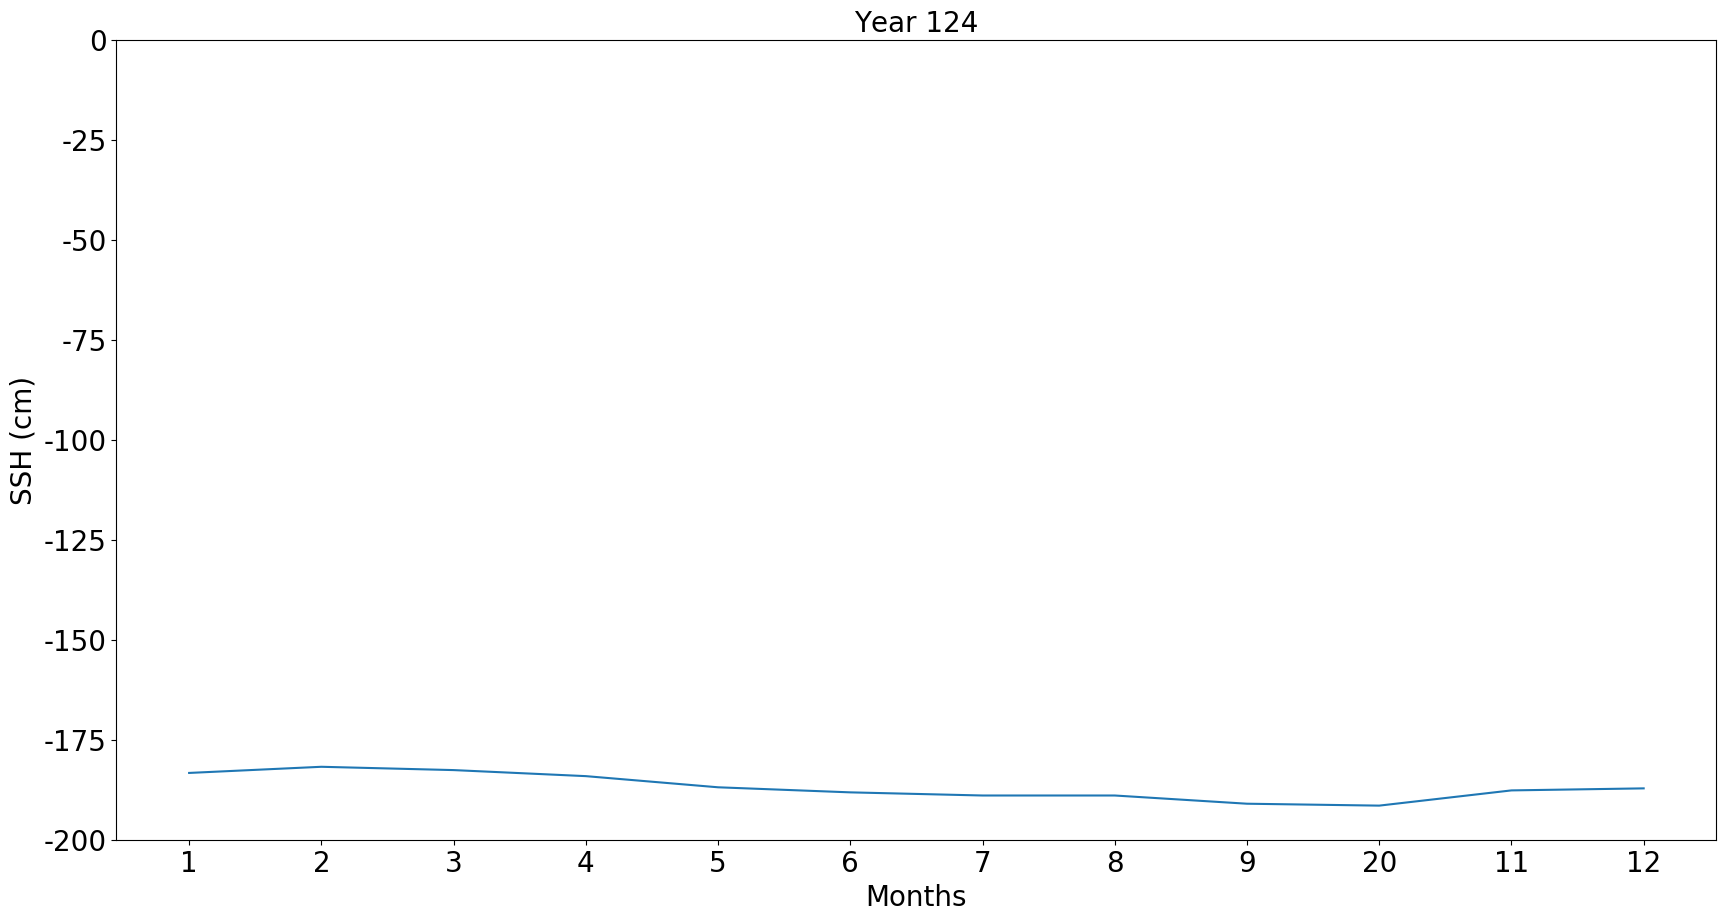

In [5]:
fig = plt.figure(figsize=(20, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(result[1248:1260])
plt.xticks(range(0,12,1), ['1','2','3', '4', '5', '6','7','8','9','20','11','12'],**my_font)
plt.yticks(range(-205,0,25), ['-200','-175','-150','-125', '-100', '-75', '-50', '-25','0'],**my_font)
plt.xlabel('Months',**my_font)
plt.ylabel('SSH (cm)',**my_font)
ax0.set_title('Year 124',**my_font)
plt.savefig("try2.png")

In [6]:
ww1 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [7]:
final = np.zeros((310))
years = np.arange(0,3720,12)
i = 0
for ii in years:
    final[i] = (result[ii]+result[ii+1]+result[ii+2]+result[ii+3]+result[ii+4]+result[ii+5]+result[ii+6]+result[ii+7]+result[ii+8]+result[ii+9]+result[ii+10]+result[ii+11])/12
    #final[i,:] = (result[ii,:]+result[ii+1,:]+result[ii+2,:])/3
    i = i+1

In [8]:
np.where(result==0)

(array([], dtype=int64),)

In [9]:
# 5 year running average
window = 5
weights = np.repeat(1.0, window)/window
smas = np.convolve(final, weights, 'valid')

Text(0.5, 1.0, 'Sea Surface Height Yearly Averaged (67$^\\circ$S - 63$^\\circ$S, 0$^\\circ$ - 10$^\\circ$E)')

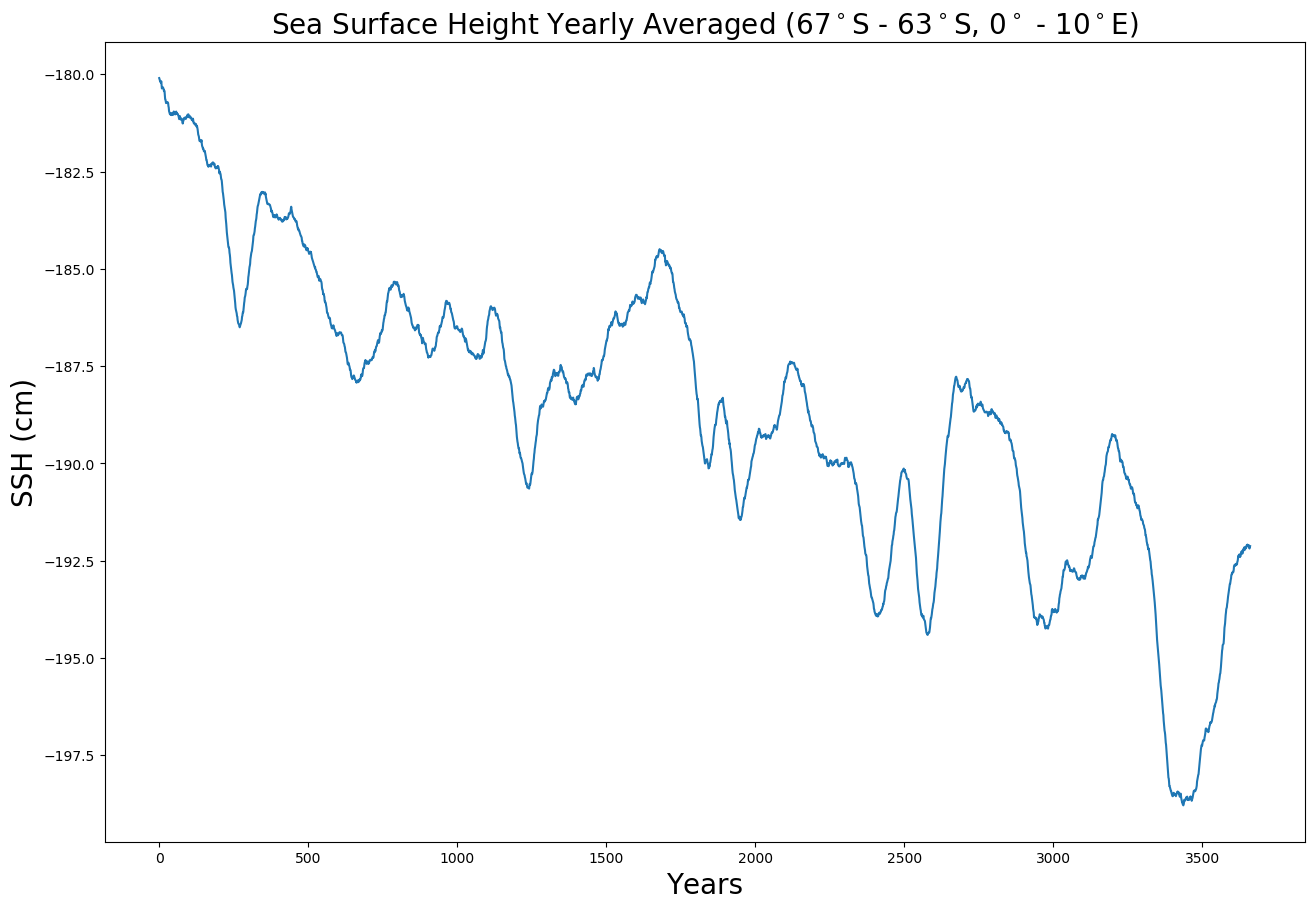

In [10]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(ww1)
#im = ax0.plot(final,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
#plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                            #'180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(range(-205,-183,3), ['-205', '-202', '-199', '-196', '-193','-190','-187','-184'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SSH (cm)',**my_font)
ax0.set_title('Sea Surface Height Yearly Averaged (67$^\circ$S - 63$^\circ$S, 0$^\circ$ - 10$^\circ$E)',**my_font)
#plt.savefig("wede2.png")

In [11]:
np.savetxt('15degree.out',ww1 )

In [12]:
dataweddle = np.loadtxt("15.out")
resultmaudrise = np.zeros(310)
resultmaudrise[:] = dataweddle

OSError: 15.out not found.

In [ ]:
t = np.arange(0,3720,12)
my_font = {'fontname':'Cambria', 'size':'13'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(ww1)
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160',\
                            '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',**my_font)
##################################################################################################
ax2 = ax0.twinx() 
ax2.plot(t, resultmaudrise,'r')
my_y_ticks = np.arange(0, 120, 20)
plt.ylim(-20, 120)
plt.yticks(my_y_ticks,**my_font)
plt.ylabel('Weddle Sea ice contration (%)',**my_font)

ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
#####################################################################################
#ax0.plot(0.0001*ww,"r*")
#plt.hlines(-1.0594455480825744e-07, 0, 319, colors = "g",linestyles = "dashed")
#plt.hlines(ww2, 0, 40, colors = "r",linestyles = "dashed")
#plt.yticks(np.arange(-1.175,-0.95,0.025), ['-1.175', '-1.150','-1.125', '-1.100', '-1.075', '-1.050','-1.025','-1','-0.975','-0.95'],**my_font)
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160',\
                            '180','200','220', '240', '260','280','300','320'],**my_font)
#ax0.set_title('Averaged the same region with SSH (70$^\circ$S - 50$^\circ$S, 55$^\circ$W - 40$^\circ$E)',**my_font)
#np.savetxt('ww1.out', 0.0001*final)
